<a href="https://colab.research.google.com/github/Jun-Liu-291/cat-dog-CNN/blob/master/cat%26dog_v7_VGG16_pretrain_featrue_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150,150,3))

Using TensorFlow backend.


58892288/58889256 [==============================] - 1s 0us/step


pass three arguments to the constructor:
1. weights specifies the weight checkpoint from which to initialize the model.
2. include_top refers to including (or not) the densely connected classifier on top of the network. By default, this densely connected classifier corresponds to the 1000 classes from ImageNet. Because you intend to use your own densly connected classifier (with only two classes: cat and dog), you don't need to include it.
3. input_shape is the shape of the image tensors that you'll feed to the network. This argument is purely optional: if you don't pass it, the network will be able to process inputs of any size.

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/drive/My Drive/dataset/cats&dogs/small_dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale = 1./255)
batch_size = 20

# get the out put of VGG model's prediction first
def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4,4,512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(
      directory,
      target_size=(150,150),
      batch_size = batch_size,
      class_mode='binary')

  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= sample_count:
      break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

print("The shape of train features is      ", train_features.shape)
print("The shape of train label is         ", train_labels.shape)
print("The shape of validation features is ", validation_features.shape)
print("The shape of validation label is    ", validation_labels.shape)
print("The shape of test features is       ", test_features.shape)
print("The shape of test features is       ", test_labels.shape)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
The shape of train features is       (2000, 4, 4, 512)
The shape of train label is          (2000,)
The shape of validation features is  (1000, 4, 4, 512)
The shape of validation label is     (1000,)
The shape of test features is        (1000, 4, 4, 512)
The shape of test features is        (1000,)


In [ ]:
# reshape the extract features into vectors
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

In [ ]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim = 4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss = 'binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size = 20,
                    validation_data = (validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.6913 - acc: 0.9955 - val_loss: 0.6898 - val_acc: 0.9900
Epoch 2/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.6833 - acc: 0.9960 - val_loss: 0.6851 - val_acc: 0.9890
Epoch 3/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.6745 - acc: 0.9970 - val_loss: 0.6774 - val_acc: 0.9890
Epoch 4/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.6655 - acc: 0.9970 - val_loss: 0.6683 - val_acc: 0.9890
Epoch 5/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.6574 - acc: 0.9970 - val_loss: 0.6594 - val_acc: 0.9890
Epoch 6/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.6472 - acc: 0.9985 - val_loss: 0.6507 - val_acc: 0.9890
Epoch 7/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.6385 - acc: 0.9985 - val_loss: 0.6418 - val_acc: 0.9890
Epoch 8/30
200

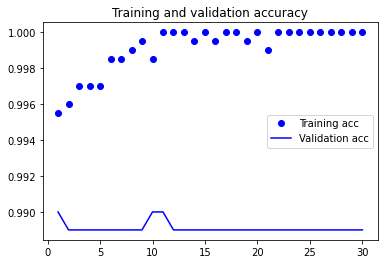

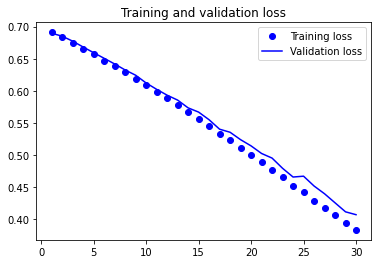

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Adding a densely connected classifier on top of the convolutional base

In [ ]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print('This is the number of trainable weights',
      'before freezing the conv base:',
      len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 10


In [ ]:
# freeze the parameter from VGG model
conv_base.trainable = False

In [ ]:
print('This is the number of trainable weights',
      'after freezing the conv base:',
      len(model.trainable_weights))
# Dense_3 weight and bais
# Dense_4 weight and bais

This is the number of trainable weights after freezing the conv base: 4


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
import os

base_dir = '/content/drive/My Drive/dataset/cats&dogs/small_dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale = 1./255)
batch_size = 20

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True

)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30


KeyboardInterrupt: ignored

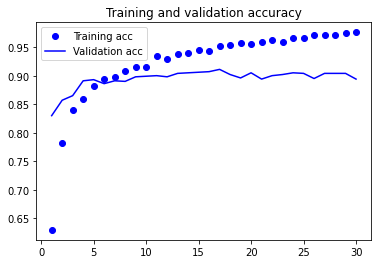

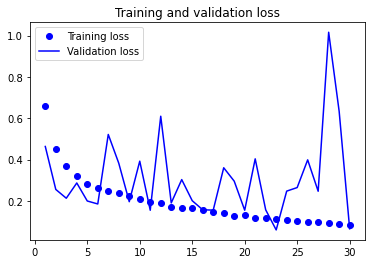

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [ ]:
print('This is the number of trainable weights',
      'before freezing the conv base:',
      len(model.trainable_weights))

# print(model.trainable_weights)
# weights and bais from block5 conv1/conv2/conv3 and Dense 3/4

This is the number of trainable weights before freezing the conv base: 10


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
import os

base_dir = '/content/drive/My Drive/dataset/cats&dogs/small_dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale = 1./255)
batch_size = 20

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True

)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 832s 8s/step - loss: 0.5482 - acc: 0.7045 - val_loss: 0.1638 - val_acc: 0.8790
Epoch 2/30
100/100 [==============================] - 758s 8s/step - loss: 0.3686 - acc: 0.8260 - val_loss: 0.5822 - val_acc: 0.9020
Epoch 3/30
100/100 [==============================] - 758s 8s/step - loss: 0.3068 - acc: 0.8710 - val_loss: 0.1488 - val_acc: 0.9200
Epoch 4/30
100/100 [==============================] - 760s 8s/step - loss: 0.2824 - acc: 0.8800 - val_loss: 0.3640 - val_acc: 0.8970
Epoch 5/30
100/100 [==============================] - 761s 8s/step - loss: 0.2503 - acc: 0.8910 - val_loss: 0.1059 - val_acc: 0.9310
Epoch 6/30
100/100 [==============================] - 759s 8s/step - loss: 0.2421 - acc: 0.8980 - val_loss: 0.2772 - val_acc: 0.9240
Epoch 7/30
100/100 [==============================] - 762s 8s/step - loss: 0.2284 - acc: 0.9070 - val_loss: 0.1267 - v